In [9]:
import numpy as np 
from numpy import cos, sin, arcsin, arctan, sqrt, pi
from matplotlib import pyplot as plt 

In [68]:
def min_max_deviation(xs_ys):
    xs, ys = xs_ys
    devs = np.sqrt(xs ** 2 + ys ** 2)
    return devs.min(), devs.max()

# def a_b_theta(ellipse_xs_ys):
#     xs, ys = ellipse_xs_ys
#     devs = np.sqrt(xs ** 2 + ys ** 2)
#     a = devs.max()
#     b = devs.min()
#     return devs.min(), devs.max()

def x_stretch(xs_ys, stretch_ratio = 1):
    xs, ys = xs_ys
    return xs*stretch_ratio, ys

def plot_points(xs_ys, *args, **kwargs):
    xs, ys = xs_ys
    plt.axis('equal')
    color = np.linspace(0, 1, xs.size)
    plt.scatter(xs, ys, marker='.', c=color, *args, **kwargs)
    # plt.show()
    return plt

def make_ellipse(a, b, theta, n_points=1000): 
    phi = np.linspace(0, 2 * np.pi, 1000)
    chi = a * np.cos(phi)
    psi = b * np.sin(phi)
    x = chi * np.cos(theta) - psi * np.sin(theta)
    y = chi * np.sin(theta) + psi * np.cos(theta)
    return x, y

In [4]:
def deform_ellipse_parameters_orig(a, b, theta, x_stretch_ratio):
    q = x_stretch_ratio
    if q == 1:
        return a, b, theta
    if sin(theta) == 0:  # ellipse is "lying"
        return q * a, b, theta
    if cos(theta) == 0:  # ellipse is "standing"
        return q * a, b, theta
    A = 2 * a * b * (q**2 - 1) * cos(theta) * sin(theta)
    B = 2 * (q**2 * b**2 - a**2) * sin(theta)**2 + 2 * (b**2 - q**2 * a**2) * cos(theta)**2
    D = B**2 + 4 * A**2;  # because C = -A
    t1 = (-B + sqrt(D)) / (2 * A)  # t = tan(phi), where phi is the old ellipse phase for which the new ellipse is farthest/nearest to the center
    t2 = (-B - sqrt(D)) / (2 * A)
    r_1sq = ( (q**2 * a**2 * cos(theta)**2 + a**2 * sin(theta)**2) * t1**2
                    +(2*a*b - 2*q**2*a*b) * cos(theta) * sin(theta) * t1
                    +(q**2 * b**2 * sin(theta)**2 + b**2 * cos(theta)**2) ) / (1 + t1**2)
    r_2sq = ( (q**2 * a**2 * cos(theta)**2 + a**2 * sin(theta)**2) * t2**2
                    +(2*a*b - 2*q**2*a*b) * cos(theta) * sin(theta) * t2
                    +(q**2 * b**2 * sin(theta)**2 + b**2 * cos(theta)**2) ) / (1 + t2**2)
    a_ = sqrt(max(r_1sq, r_2sq))                        
    b_ = sqrt(min(r_1sq, r_2sq))
    sin2theta_ = sin(2 * theta) * (1/a**2 - 1/b**2) / q / (1/a_**2 - 1/b_**2) 
    theta_ = 0.5 * arcsin(sin2theta_)
    print(a, b, theta, '-->', a_, b_, theta_)
    return a_, b_, theta_

In [71]:
def deform_ellipse_parameters(a, b, theta, x_stretch_ratio):
    q = x_stretch_ratio
    if q == 1:
        return a, b, theta
    if theta == 0 or sin(2*theta) == 0:  # ellipse is "lying" or "standing"
        return q * a, b, theta
    if a == b:
        return q*a, b, 0
    K1 = q**2 * a**2 * cos(theta)**2 + a**2 * sin(theta)**2
    K2 = 2 * (1 - q**2) * a * b * cos(theta) * sin(theta)
    K3 = q**2 * b**2 * sin(theta)**2 + b**2 * cos(theta)**2
    A, B, C = K2, 2 * (K1 - K3), -K2
    D = B**2 - 4 * A * C
    t1 = (-B + sqrt(D)) / (2 * A)
    t2 = (-B - sqrt(D)) / (2 * A)
    a_ = sqrt((K1 + K2 * t1 + K3 * t1**2) / (1 + t1 **2))
    b_ = sqrt((K1 + K2 * t2 + K3 * t2**2) / (1 + t2 **2))
    if a_ < b_:
        t1, t2 = t2, t1
        a_, b_ = b_, a_
    sqcosphi = 1 / (1 + t1**2)
    sqsinphi = 1 - sqcosphi
    cossinphi = t1 / (1 + t1**2)
    sqcostheta = cos(theta)**2
    sqsintheta = sin(theta)**2
    cossintheta = cos(theta) * sin(theta)
    numer = a**2 * cossintheta * sqcosphi + a * b * cossinphi + b**2 * cossintheta * sqsinphi
    denom = q * (a**2 * sqcostheta * sqcosphi - b**2 * sqsintheta * sqsinphi)
    theta_ = arctan(numer / denom)
    return a_, b_, theta_

(2.0000129797495863, 5.0)


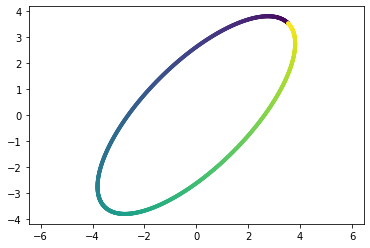

In [28]:
# a, b = 5, 2
# theta = 1/4 * np.pi
ellipse1 = make_ellipse(5, 2, pi/4)
print(min_max_deviation(ellipse1))
plot_points(ellipse1)

(2.549138390214349, 11.768669899474759)


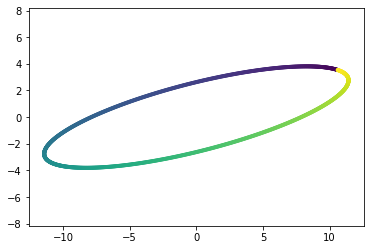

In [29]:
stretch = 3
ellipse2 = x_stretch(ellipse1, stretch)
print(min_max_deviation(ellipse2))
plot_points(ellipse2)

In [64]:
deform_ellipse_parameters(5, 2, pi/4, 3)

(11.768682760284621, 2.5491383029917327, 0.2487664694524618)

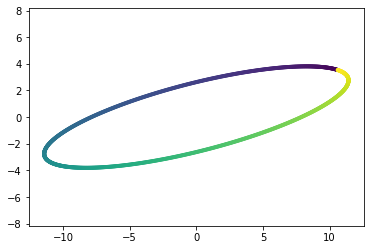

<module 'matplotlib.pyplot' from '/home/adam/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

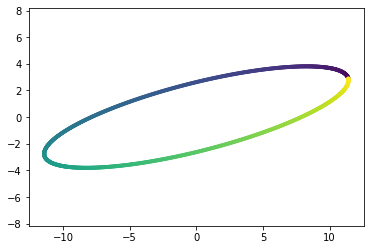

In [69]:
ellipse3 = make_ellipse(*deform_ellipse_parameters(5, 2, pi/4, 3))
plot_points(ellipse2).show()
# plt.scatter(np.array([8.69265]), np.array([3.802135]), s=100)
# plt.scatter(np.array([11.406405808069607]), np.array([2.897550768124061]), s=100)
plot_points(ellipse3)

<module 'matplotlib.pyplot' from '/home/adam/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

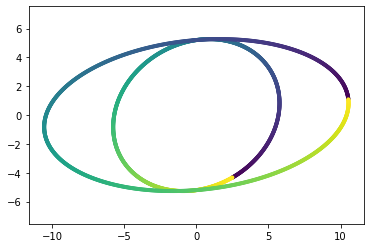

In [80]:
ellipse4 = make_ellipse(5, 6, -pi/3)
ellipse5 = make_ellipse(*deform_ellipse_parameters(5, 6, -pi/3, 1.83))
plot_points(ellipse4)
plot_points(ellipse5)
